In [1]:
from qiskit import *
from qiskit.visualization import *
import numpy as np
from qiskit.tools.monitor import *
from qiskit.quantum_info import *
from qiskit.extensions import *
from qiskit_experiments.framework import *
from qiskit_experiments.library import *
from qiskit.test.mock import *
from qiskit.providers.aer import *

In [2]:
#state = random_statevector(2)
state = [1, 0]
sent = Initialize(state)

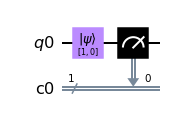

In [3]:
#measures sent state
circuit_1 = QuantumCircuit(QuantumRegister(1), ClassicalRegister(1))
circuit_1.append(sent, [0])
circuit_1.measure(0, 0)
circuit_1.draw()

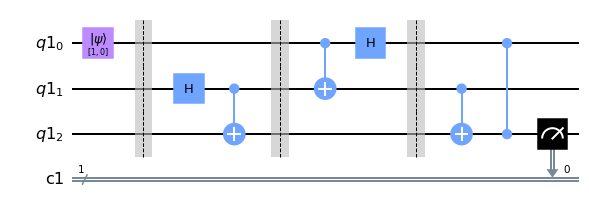

In [4]:
#measures received state
circuit_2 = QuantumCircuit(QuantumRegister(3), ClassicalRegister(1))
circuit_2.append(sent, [0])
circuit_2.barrier()
circuit_2.h(1)
circuit_2.cx(1, 2)
circuit_2.barrier()
circuit_2.cx(0, 1)
circuit_2.h(0)
circuit_2.barrier()
circuit_2.cx(1, 2)
circuit_2.cz(0, 2)
circuit_2.measure(2, 0)
circuit_2.draw()

In [5]:
#initializing providers
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
quito_sim = quito_sim = AerSimulator.from_backend(FakeQuito())

[1, 0]


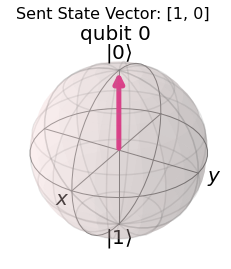

In [6]:
#shows sent state vector
print(state)
plot_bloch_multivector(sent, title = "Sent State Vector: " + str(state))

In [7]:
#real hardware tomography
exp_1 = StateTomography(circuit_2)
data_1 = exp_1.run(backend, seed_simulation = 1024).block_for_results()
state_analysis_1 = data_1.analysis_results("state").value

C:\Users\nehas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\qiskit_experiments\framework\base_experiment.py:345: UserWarning: seed_simulation is not a recognized runtime option and may be ignored by the backend.
  jobs = [self.backend.run(circs, **run_options) for circs in job_circuits]


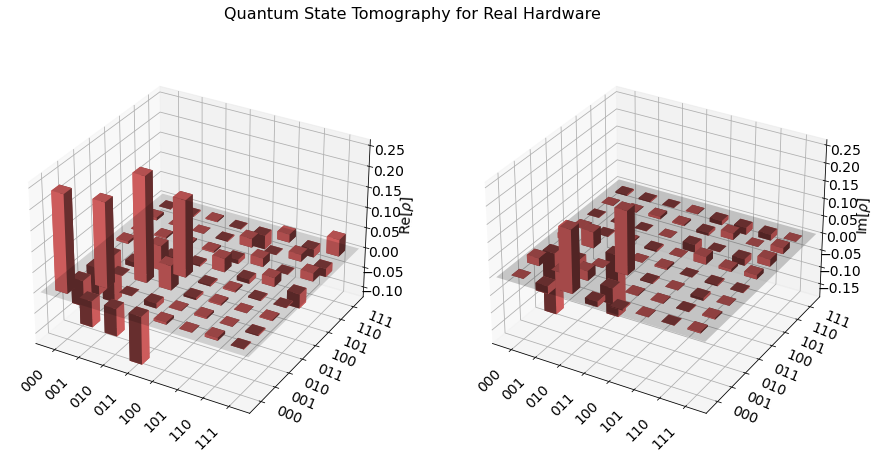

In [39]:
plot_state_city(state_analysis_1, figsize = [15, 7], color = ['indianred', 'indianred'], title = "Quantum State Tomography for Real Hardware")

In [9]:
#perfect simulation tomography
exp_2 = StateTomography(circuit_2)
data_2 = exp_2.run(simulator, seed_simulation = 1024).block_for_results()
state_analysis_2 = data_2.analysis_results("state").value

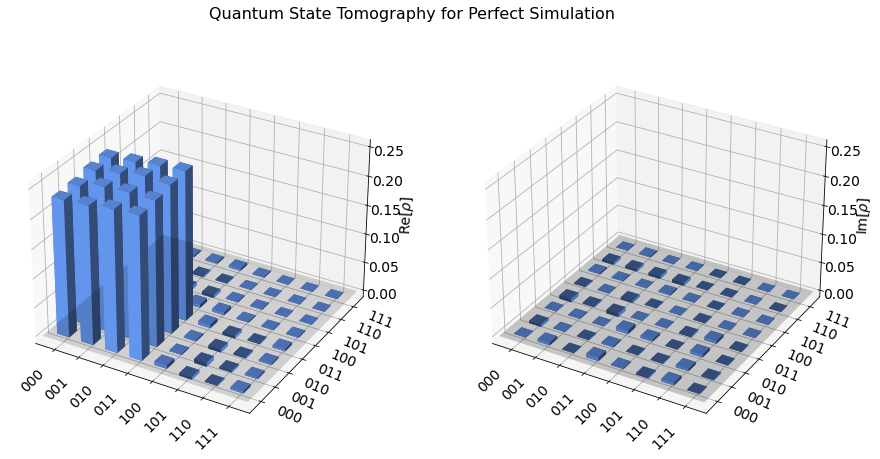

In [40]:
plot_state_city(state_analysis_2, figsize = [15, 7], color = ['cornflowerblue', 'cornflowerblue'], title = "Quantum State Tomography for Perfect Simulation")

In [11]:
#noisy simulation tomography
exp_3 = StateTomography(circuit_2)
data_3 = exp_3.run(quito_sim, seed_simulation = 1024).block_for_results()
state_analysis_3 = data_3.analysis_results("state").value

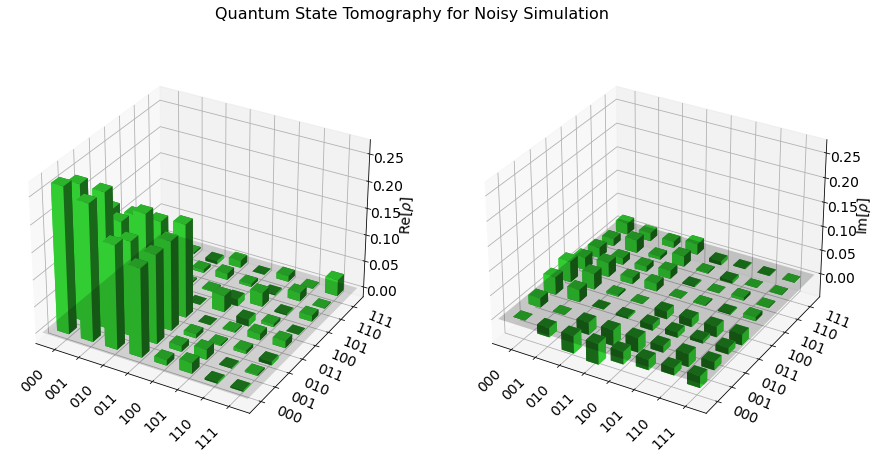

In [42]:
plot_state_city(state_analysis_3, figsize = [15, 7], color = ['limegreen', 'limegreen'], title = "Quantum State Tomography for Noisy Simulation")

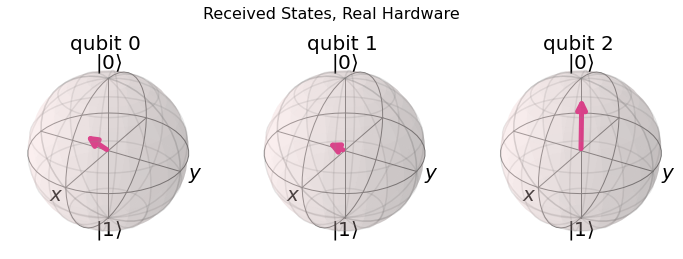

In [13]:
#received state vector on real hardware
plot_bloch_multivector(state_analysis_1, title = "Received States, Real Hardware")

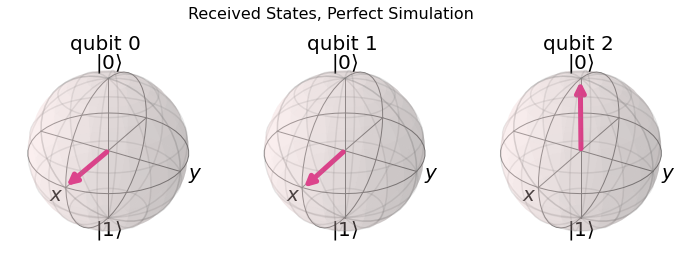

In [14]:
#received state vector on perfect simulation
plot_bloch_multivector(state_analysis_2, title = "Received States, Perfect Simulation")

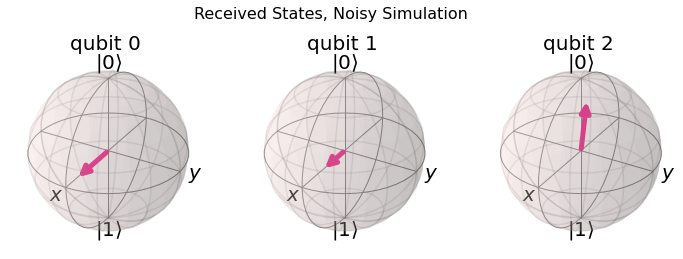

In [15]:
#received state vector on noise model
plot_bloch_multivector(state_analysis_3, title = "Received States, Noisy Simulation")

In [16]:
job_1 = execute(circuit_1, backend = backend, shots = 1024)
counts_1 = job_1.result().get_counts()
job_2 = execute(circuit_1, backend = simulator, shots = 1024)
counts_2 = job_2.result().get_counts()
job_3 = execute(circuit_1, backend = quito_sim, shots = 1024)
counts_3 = job_3.result().get_counts()

job_1_1 = execute(circuit_2, backend = backend, shots = 1024)
counts_1_1 = job_1_1.result().get_counts()
job_2_1 = execute(circuit_2, backend = simulator, shots = 1024)
counts_2_1 = job_2_1.result().get_counts()
job_3_1 = execute(circuit_2, backend = quito_sim, shots = 1024)
counts_3_1 = job_3_1.result().get_counts()

[{'0': 1024}, {'0': 1024}, {'0': 999, '1': 25}, {'0': 968, '1': 56}, {'0': 1016, '1': 8}, {'0': 937, '1': 87}]


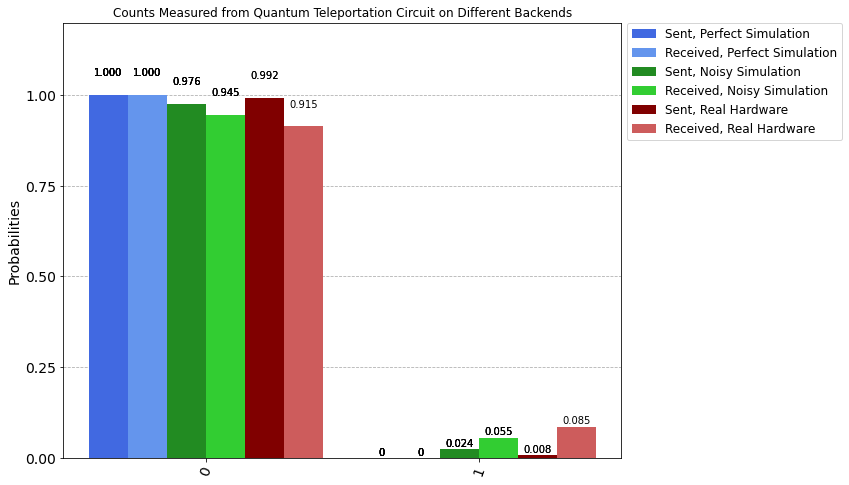

In [17]:
data = [counts_2, counts_2_1, counts_3, counts_3_1, counts_1, counts_1_1]
print(data)

legend = [
    'Sent, Perfect Simulation', 'Received, Perfect Simulation', 
    'Sent, Noisy Simulation', 'Received, Noisy Simulation', 
    'Sent, Real Hardware', 'Received, Real Hardware'
]
color = [
    'royalblue', 'cornflowerblue', 
    'forestgreen', 'limegreen', 
    'maroon', 'indianred' 
]
plot_histogram(data, legend = legend, color = color, figsize = (10, 8), 
               title = "Counts Measured from Quantum Teleportation Circuit on Different Backends")

In [18]:
from qiskit.quantum_info.analysis import hellinger_fidelity

In [19]:
#real
hellinger_fidelity(counts_1, counts_1_1)

0.9576506696725884

In [20]:
#perfect
hellinger_fidelity(counts_2, counts_2_1)

1.0

In [21]:
#noisy
hellinger_fidelity(counts_3, counts_3_1)

0.9937489128932632